In [12]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

# Data Preparation

In [5]:
x = pd.read_csv("fashion-mnist.csv")
X_ = np.array(x)
X = X_[:,1:]
X=X/255.0
y = X_[:,0]
print(X.shape,y.shape)

(10000, 784) (10000,)


In [6]:
print(np.unique(y)) # This would give us total calss number
print(np.unique(y,return_counts=True)) # Well balanced data

[0 1 2 3 4 5 6 7 8 9]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


In [8]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)
print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


In [9]:
import matplotlib.pyplot as plt

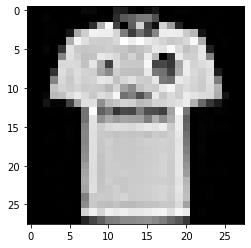

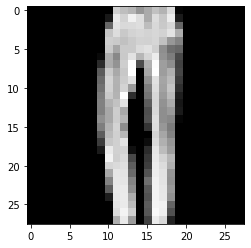

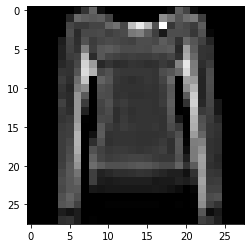

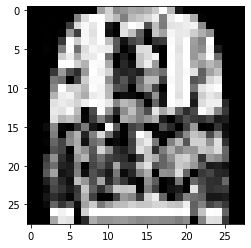

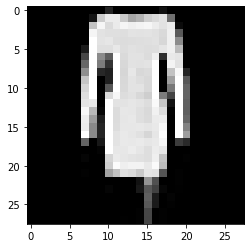

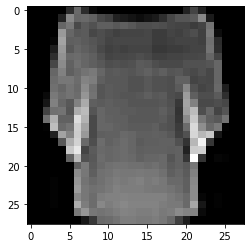

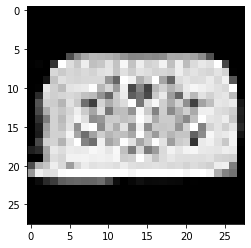

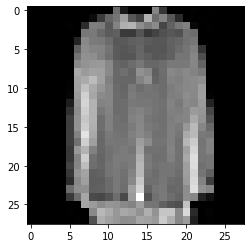

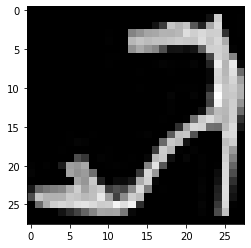

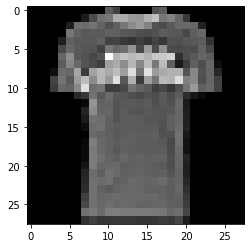

In [11]:
for i in range(10):
    plt.figure(i)
    plt.imshow(X_train[i].reshape((28,28)),cmap="gray")
    plt.show()

# CNN Model

In [15]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25)) # DRop 25% layer
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [17]:
# Before training the model we need to compile the keras model , what should be the optimizer, loss function etc
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [19]:
host = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/20
32/32 [==============================] - 11s 332ms/step - loss: 1.7492 - accuracy: 0.3421 - val_loss: 1.1008 - val_accuracy: 0.6520
Epoch 2/20
32/32 [==============================] - 9s 291ms/step - loss: 0.8582 - accuracy: 0.6871 - val_loss: 0.7496 - val_accuracy: 0.7380
Epoch 3/20
32/32 [==============================] - 9s 293ms/step - loss: 0.6727 - accuracy: 0.7449 - val_loss: 0.6697 - val_accuracy: 0.7535
Epoch 4/20
32/32 [==============================] - 9s 293ms/step - loss: 0.6088 - accuracy: 0.7704 - val_loss: 0.6033 - val_accuracy: 0.7780
Epoch 5/20
32/32 [==============================] - 9s 296ms/step - loss: 0.5529 - accuracy: 0.7955 - val_loss: 0.5872 - val_accuracy: 0.7830
Epoch 6/20
32/32 [==============================] - 10s 297ms/step - loss: 0.5298 - accuracy: 0.8024 - val_loss: 0.5310 - val_accuracy: 0.8110
Epoch 7/20
32/32 [==============================] - 10s 298ms/step - loss: 0.4903 - accuracy: 0.8173 - val_loss: 0.5170 - val_accuracy: 0.8235
Epo

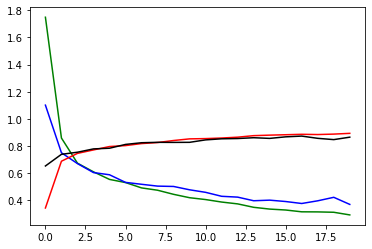

In [22]:
plt.figure(0)
plt.plot(host.history['loss'],'g')
plt.plot(host.history['val_loss'],'b')

plt.plot(host.history['accuracy'],'r')
plt.plot(host.history['val_accuracy'],'black')
plt.show()

# We can see that in each epoch our accuracy got increased.